In [184]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [185]:
df       = pd.read_csv(os.path.join('..', 'datasets', 'auto-mpg.csv'))
df_train = df.sample(frac = .6, random_state = 0)
df_test  = df.drop(df_train.index)

In [186]:
df_train.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,239.000000,239.000000,239.000000,235.000000,239.000000,239.000000,239.000000,239.000000
mean,23.621339,5.451883,195.259414,104.974468,2968.150628,15.583682,75.966527,1.548117
std,8.023699,1.696755,106.391103,39.826431,850.680772,2.854560,3.743752,0.807519
min,10.000000,3.000000,70.000000,46.000000,1613.000000,8.500000,70.000000,1.000000
25%,17.000000,4.000000,98.000000,NaN,2219.500000,13.850000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,NaN,2795.000000,15.500000,76.000000,1.000000
75%,29.950000,8.000000,282.000000,NaN,3626.000000,17.400000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [187]:
df_train.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.781745,-0.805026,-0.769034,-0.824551,0.439509,0.564771,0.566060
cylinders,-0.781745,1.000000,0.951524,0.852893,0.897287,-0.546725,-0.342224,-0.546450
displacement,-0.805026,0.951524,1.000000,0.904732,0.931795,-0.576716,-0.357156,-0.604139
horsepower,-0.769034,0.852893,0.904732,1.000000,0.856757,-0.715311,-0.396199,-0.466080
weight,-0.824551,0.897287,0.931795,0.856757,1.000000,-0.447657,-0.290378,-0.572944
acceleration,0.439509,-0.546725,-0.576716,-0.715311,-0.447657,1.000000,0.264275,0.274395
model_year,0.564771,-0.342224,-0.357156,-0.396199,-0.290378,0.264275,1.000000,0.157586
origin,0.566060,-0.546450,-0.604139,-0.466080,-0.572944,0.274395,0.157586,1.000000


# Scatterplots

## MPG ~ Cylinders

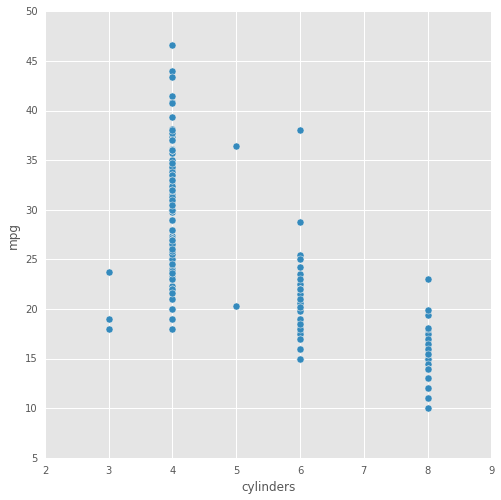

In [188]:
df_train.plot(kind = 'scatter', x = 'cylinders', y = 'mpg', s = 50, figsize = (8,8))

## MPG ~ Displacement

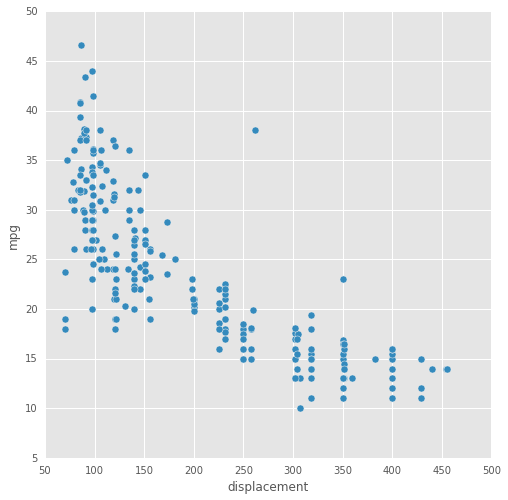

In [189]:
df_train.plot(kind = 'scatter', x = 'displacement', y = 'mpg', s = 50, figsize = (8,8))

## MPG ~ Horsepower

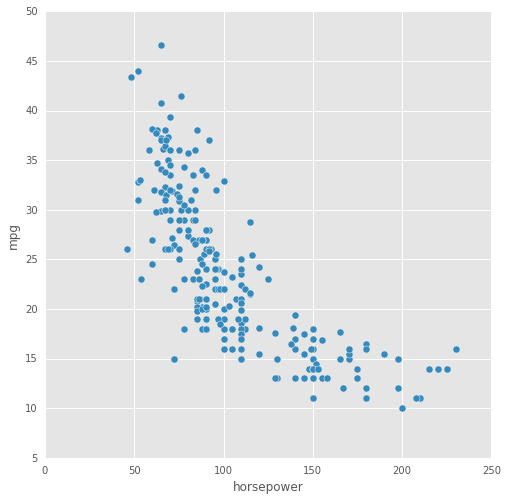

In [190]:
df_train.plot(kind = 'scatter', x = 'horsepower', y = 'mpg', s = 50, figsize = (8,8))

## MPG ~ Weight

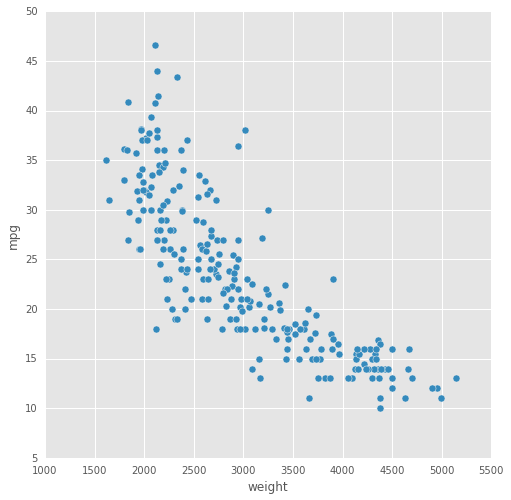

In [191]:
df_train.plot(kind = 'scatter', x = 'weight', y = 'mpg', s = 50, figsize = (8,8))

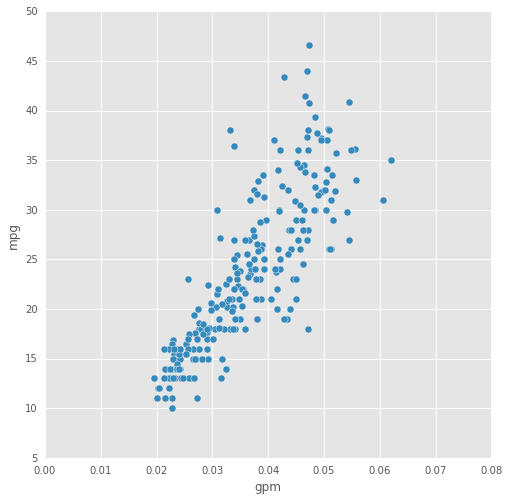

In [192]:
df_train['gpm'] = (1.0 / df_train.weight) * 100
df_train.plot(kind = 'scatter', x = 'gpm', y = 'mpg', s = 50, figsize = (8,8))

## MPG ~ Acceleration

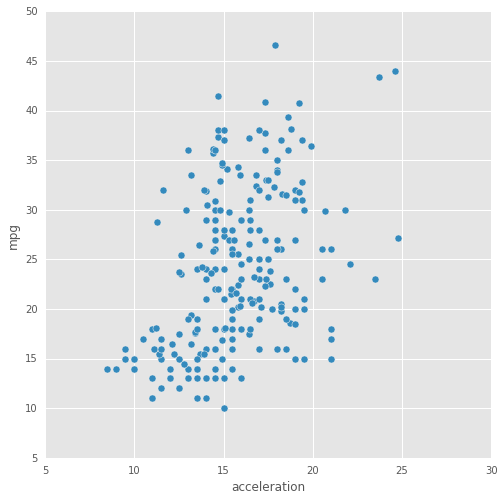

In [193]:
df_train.plot(kind = 'scatter', x = 'acceleration', y = 'mpg', s = 50, figsize = (8,8))

## MPG ~ Model Year

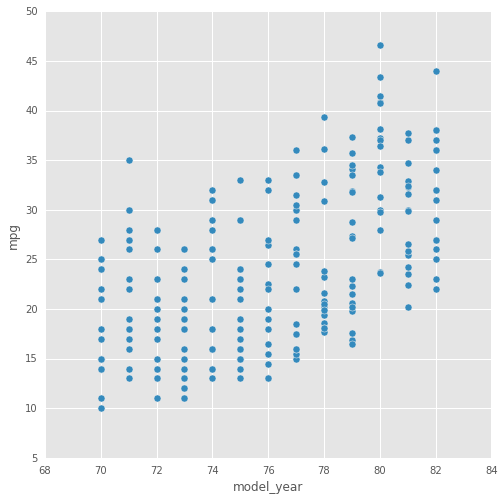

In [194]:
df_train.plot(kind = 'scatter', x = 'model_year', y = 'mpg', s = 50, figsize = (8,8))

## MPG ~ Origin

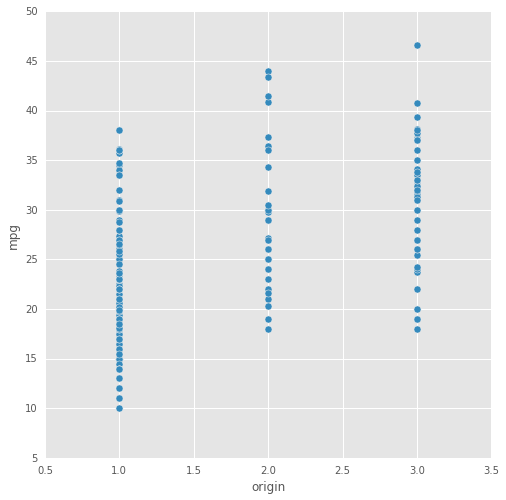

In [195]:
df_train.plot(kind = 'scatter', x = 'origin', y = 'mpg', s = 50, figsize = (8,8))

# Derive GPM

In [197]:
df_train['gpm'] = 1.0 / df_train.mpg

## GPM ~ Cylinders

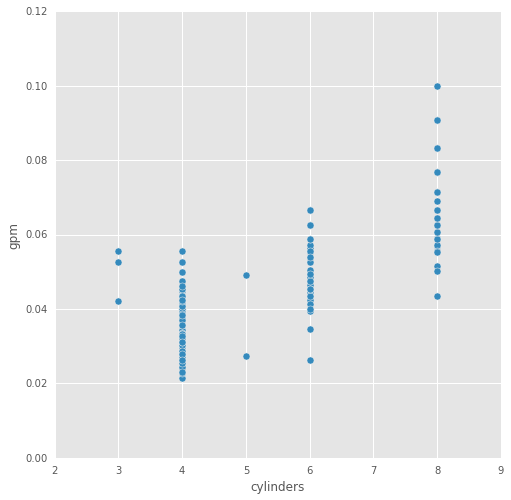

In [198]:
df_train.plot(kind = 'scatter', x = 'cylinders', y = 'gpm', s = 50, figsize = (8,8))

## GPM ~ Displacement

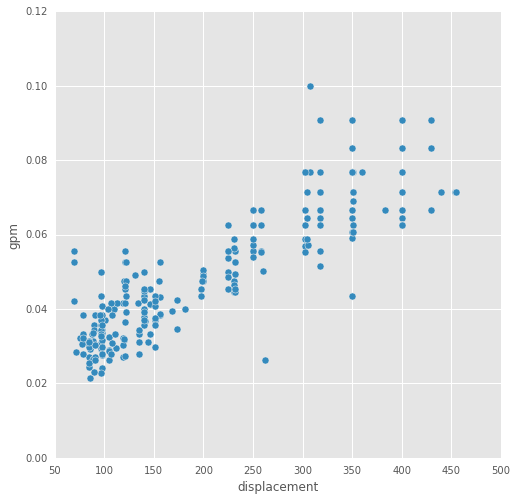

In [199]:
df_train.plot(kind = 'scatter', x = 'displacement', y = 'gpm', s = 50, figsize = (8,8))

## GPM ~ Horsepower

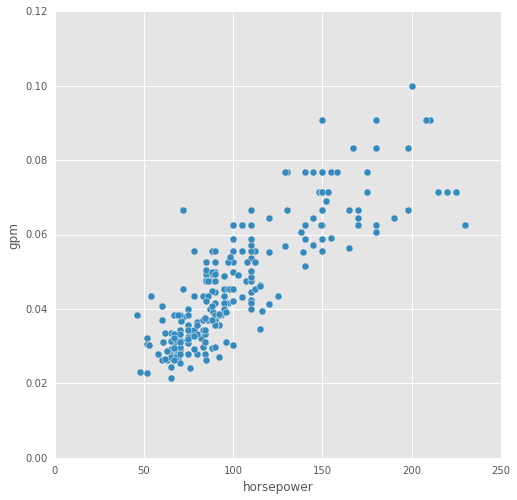

In [200]:
df_train.plot(kind = 'scatter', x = 'horsepower', y = 'gpm', s = 50, figsize = (8,8))

## GPM ~ Weight

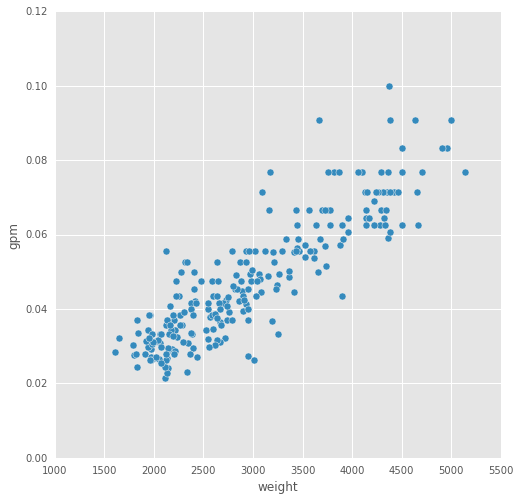

In [201]:
df_train.plot(kind = 'scatter', x = 'weight', y = 'gpm', s = 50, figsize = (8,8))

## GPM ~ Acceleration

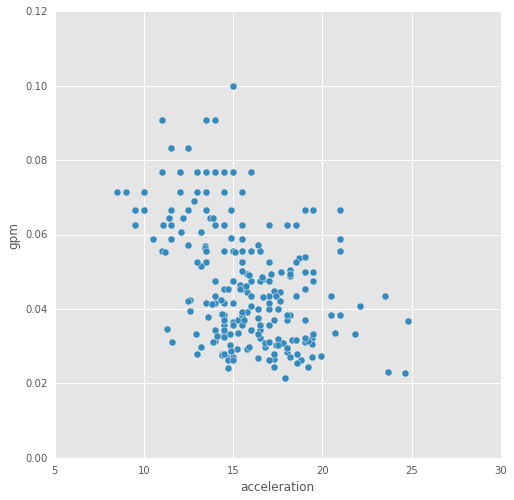

In [207]:
df_train.plot(kind = 'scatter', x = 'acceleration', y = 'gpm', s = 50, figsize = (8,8))

## GPM ~ Model Year

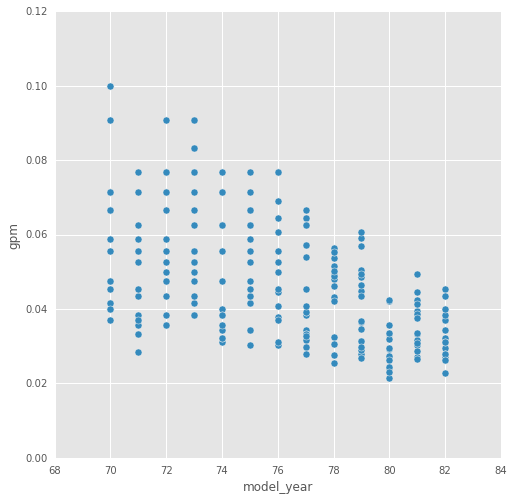

In [208]:
df_train.plot(kind = 'scatter', x = 'model_year', y = 'gpm', s = 50, figsize = (8,8))

## GPM ~ Origin

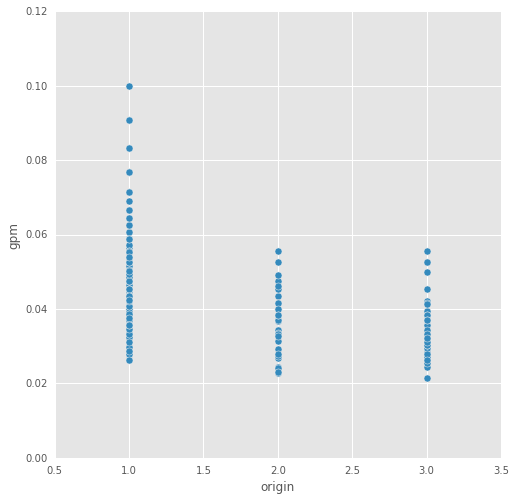

In [209]:
df_train.plot(kind = 'scatter', x = 'origin', y = 'gpm', s = 50, figsize = (8,8))

# Linear Regression

## MPG ~ Cylinders

In [129]:
smf.ols(formula = 'mpg ~ cylinders', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     372.5
Date:                Mon, 15 Aug 2016   Prob (F-statistic):           1.63e-50
Time:                        20:11:22   Log-Likelihood:                -723.45
No. Observations:                 239   AIC:                             1451.
Df Residuals:                     237   BIC:                             1458.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     43.7756      1.094     40.032      0.000        41.621    45.930
cylinders     -3.6968      0.192    -19.299      0.000        -4.074    -3.319
==============================================================================
Omnibus:                       18.546   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.066
Skew:                           0.537   Prob(JB):                     3.61e-06
Kurtosis:                       4.168   Cond. No.                         19.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## MPG ~ Displacement

In [131]:
smf.ols(formula = 'mpg ~ displacement', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     436.4
Date:                Mon, 15 Aug 2016   Prob (F-statistic):           1.16e-55
Time:                        20:12:20   Log-Likelihood:                -711.52
No. Observations:                 239   AIC:                             1427.
Df Residuals:                     237   BIC:                             1434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       35.4761      0.646     54.923      0.000        34.204    36.749
displacement    -0.0607      0.003    -20.891      0.000        -0.066    -0.055
==============================================================================
Omnibus:                       23.949   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.823
Skew:                           0.660   Prob(JB):                     7.46e-08
Kurtosis:                       4.246   Cond. No.                         465.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## MPG ~ Horsepower

In [133]:
smf.ols(formula = 'mpg ~ horsepower', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     337.3
Date:                Mon, 15 Aug 2016   Prob (F-statistic):           3.51e-47
Time:                        20:13:14   Log-Likelihood:                -716.76
No. Observations:                 235   AIC:                             1438.
Df Residuals:                     233   BIC:                             1444.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.7994      0.945     42.097      0.000        37.937    41.662
horsepower    -0.1547      0.008    -18.365      0.000        -0.171    -0.138
==============================================================================
Omnibus:                        6.227   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                6.069
Skew:                           0.390   Prob(JB):                       0.0481
Kurtosis:                       3.105   Cond. No.                         317.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## MPG ~ Weight

In [231]:
smf.ols(formula = 'mpg ~ weight', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     503.4
Date:                Mon, 15 Aug 2016   Prob (F-statistic):           1.50e-60
Time:                        21:26:49   Log-Likelihood:                -700.20
No. Observations:                 239   AIC:                             1404.
Df Residuals:                     237   BIC:                             1411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     46.7054      1.070     43.644      0.000        44.597    48.814
weight        -0.0078      0.000    -22.436      0.000        -0.008    -0.007
==============================================================================
Omnibus:                       23.565   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.040
Skew:                           0.655   Prob(JB):                     1.10e-07
Kurtosis:                       4.225   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Covariance

## Displacement ~ Horsepower

In [107]:
smf.ols(formula = 'displacement ~ horsepower', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           displacement   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     358.6
Date:                Mon, 15 Aug 2016   Prob (F-statistic):           3.49e-34
Time:                        20:00:00   Log-Likelihood:                -509.66
No. Observations:                  98   AIC:                             1023.
Df Residuals:                      96   BIC:                             1028.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -56.9896     13.396     -4.254      0.000       -83.580   -30.399
horsepower     2.3783      0.126     18.936      0.000         2.129     2.628
==============================================================================
Omnibus:                        0.141   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.213
Skew:                           0.087   Prob(JB):                        0.899
Kurtosis:                       2.852   Cond. No.                         319.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Displacement ~ Weight

In [108]:
smf.ols(formula = 'displacement ~ weight', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           displacement   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     825.3
Date:                Mon, 15 Aug 2016   Prob (F-statistic):           1.58e-49
Time:                        20:00:03   Log-Likelihood:                -485.08
No. Observations:                 100   AIC:                             974.2
Df Residuals:                      98   BIC:                             979.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -158.8582     12.234    -12.985      0.000      -183.137  -134.580
weight         0.1185      0.004     28.728      0.000         0.110     0.127
==============================================================================
Omnibus:                        5.397   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                6.777
Skew:                           0.215   Prob(JB):                       0.0338
Kurtosis:                       4.200   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Horsepower ~ Weight

In [109]:
smf.ols(formula = 'horsepower ~ weight', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             horsepower   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     284.0
Date:                Mon, 15 Aug 2016   Prob (F-statistic):           1.94e-30
Time:                        20:00:05   Log-Likelihood:                -421.90
No. Observations:                  98   AIC:                             847.8
Df Residuals:                      96   BIC:                             853.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -15.5175      7.124     -2.178      0.032       -29.658    -1.376
weight         0.0404      0.002     16.854      0.000         0.036     0.045
==============================================================================
Omnibus:                       11.663   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               18.178
Skew:                           0.506   Prob(JB):                     0.000113
Kurtosis:                       4.852   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Modeling

In [212]:
explanatory_variables = ['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration', 'model_year', 'origin']
        
for variable in explanatory_variables:
    my_formula = 'mpg ~ weight + {variable}'.format(variable = variable)
    r_squared = smf.ols(formula = my_formula, data = df_train).fit().rsquared
    print '{variable}: {r_squared}'.format(variable = variable, r_squared = r_squared)

print

for variable in explanatory_variables:
    my_formula = 'mpg ~ weight * {variable}'.format(variable = variable)
    r_squared = smf.ols(formula = my_formula, data = df_train).fit().rsquared
    print '{variable}: {r_squared}'.format(variable = variable, r_squared = r_squared)

mpg: 1.0
cylinders: 0.688887436655
displacement: 0.690114623677
horsepower: 0.693890851936
acceleration: 0.686081606131
model_year: 0.795477119391
origin: 0.692937568577

mpg: 1.0
cylinders: 0.711623230955
displacement: 0.721040864411
horsepower: 0.740775122308
acceleration: 0.695380767196
model_year: 0.825535407675
origin: 0.694839166539


## MPG ~ Weight + Model Year

In [225]:
smf.ols(formula = 'mpg ~ weight + model_year', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     459.0
Date:                Mon, 15 Aug 2016   Prob (F-statistic):           4.65e-82
Time:                        21:20:44   Log-Likelihood:                -646.66
No. Observations:                 239   AIC:                             1299.
Df Residuals:                     236   BIC:                             1310.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -14.0302      5.328     -2.633      0.009       -24.527    -3.533
weight        -0.0068      0.000    -23.449      0.000        -0.007    -0.006
model_year     0.7615      0.066     11.549      0.000         0.632     0.891
==============================================================================
Omnibus:                       18.161   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.943
Skew:                           0.538   Prob(JB):                     6.32e-06
Kurtosis:                       4.116   Cond. No.                     6.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [226]:
smf.ols(formula = 'mpg ~ 0 + weight + model_year', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     5343.
Date:                Mon, 15 Aug 2016   Prob (F-statistic):          7.30e-198
Time:                        21:21:00   Log-Likelihood:                -650.12
No. Observations:                 239   AIC:                             1304.
Df Residuals:                     237   BIC:                             1311.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
weight        -0.0071      0.000    -26.971      0.000        -0.008    -0.007
model_year     0.5901      0.011     54.951      0.000         0.569     0.611
==============================================================================
Omnibus:                       25.644   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.942
Skew:                           0.653   Prob(JB):                     3.50e-09
Kurtosis:                       4.485   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

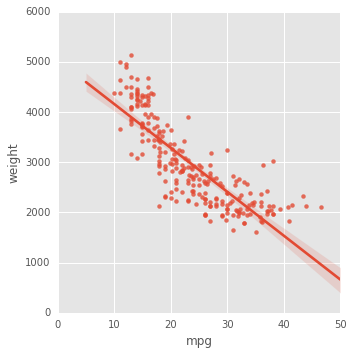

In [219]:
sns.lmplot('mpg', 'weight', df_train).set(xlim = (0, None), ylim = (0, None))

## GPM ~ Weight

In [233]:
smf.ols(formula = 'gpm ~ weight', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     833.3
Date:                Mon, 15 Aug 2016   Prob (F-statistic):           1.51e-79
Time:                        21:28:47   Log-Likelihood:                 819.11
No. Observations:                 239   AIC:                            -1634.
Df Residuals:                     237   BIC:                            -1627.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0039      0.002     -2.085      0.038        -0.008    -0.000
weight      1.736e-05   6.01e-07     28.867      0.000      1.62e-05  1.85e-05
==============================================================================
Omnibus:                       27.037   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.948
Skew:                           0.622   Prob(JB):                     3.87e-11
Kurtosis:                       4.808   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

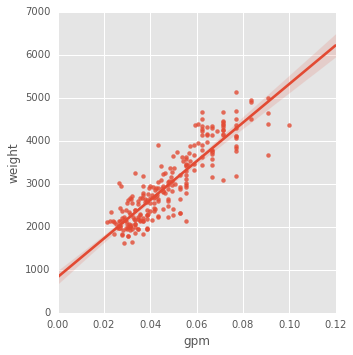

In [218]:
sns.lmplot('gpm', 'weight', df_train).set(xlim = (0, None), ylim = (0, None))

## GPM ~ 0 + Weight

In [234]:
smf.ols(formula = 'gpm ~ 0 + weight', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     9411.
Date:                Mon, 15 Aug 2016   Prob (F-statistic):          2.39e-193
Time:                        21:28:55   Log-Likelihood:                 816.94
No. Observations:                 239   AIC:                            -1632.
Df Residuals:                     238   BIC:                            -1628.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
weight      1.615e-05   1.67e-07     97.010      0.000      1.58e-05  1.65e-05
==============================================================================
Omnibus:                       32.085   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.609
Skew:                           0.716   Prob(JB):                     1.88e-13
Kurtosis:                       4.959   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## GPM ~ Weight + Model Year

In [211]:
smf.ols(formula = 'gpm ~ weight + model_year', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     759.3
Date:                Mon, 15 Aug 2016   Prob (F-statistic):          1.54e-103
Time:                        21:00:16   Log-Likelihood:                 878.69
No. Observations:                 239   AIC:                            -1751.
Df Residuals:                     236   BIC:                            -1741.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1060      0.009     11.761      0.000         0.088     0.124
weight       1.56e-05   4.91e-07     31.782      0.000      1.46e-05  1.66e-05
model_year    -0.0014      0.000    -12.351      0.000        -0.002    -0.001
==============================================================================
Omnibus:                       54.272   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.387
Skew:                           1.007   Prob(JB):                     1.21e-31
Kurtosis:                       6.201   Cond. No.                     6.98e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## GPM ~ 0 + Weight + Model Year

In [227]:
smf.ols(formula = 'gpm ~ 0 + weight + model_year', data = df_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4960.
Date:                Mon, 15 Aug 2016   Prob (F-statistic):          4.05e-194
Time:                        21:23:15   Log-Likelihood:                 823.57
No. Observations:                 239   AIC:                            -1643.
Df Residuals:                     237   BIC:                            -1636.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
weight      1.811e-05   5.55e-07     32.596      0.000       1.7e-05  1.92e-05
model_year -8.291e-05   2.25e-05     -3.677      0.000        -0.000 -3.85e-05
==============================================================================
Omnibus:                       24.989   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.125
Skew:                           0.571   Prob(JB):                     1.59e-10
Kurtosis:                       4.797   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

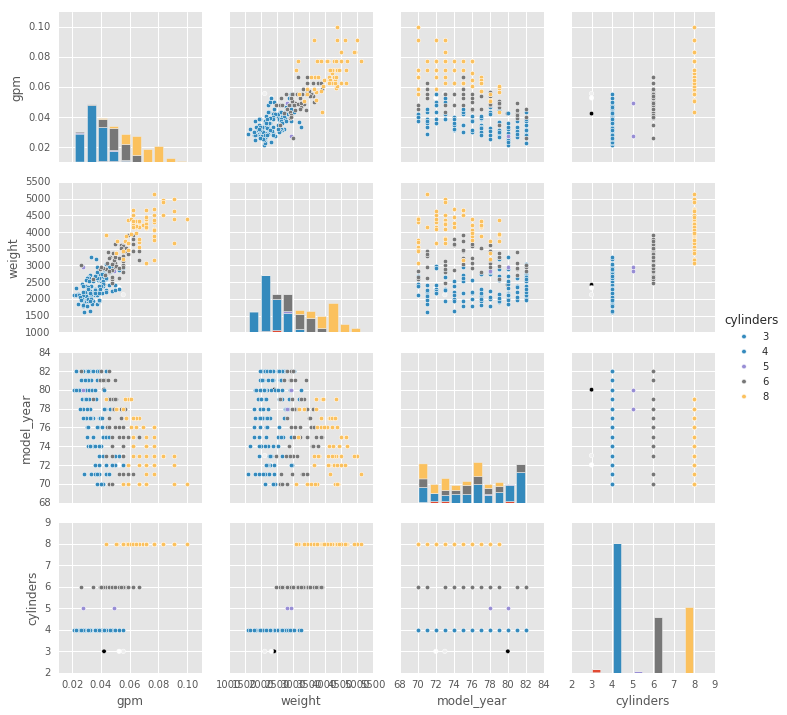

In [223]:
sns.pairplot(df_train[['gpm','weight','model_year','cylinders']], hue='cylinders')